In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

# 1. Read in Image, Grayscale and Blur

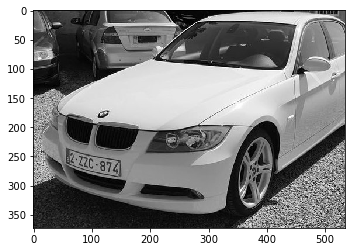

In [141]:
img = cv2.imread('image10.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# 2. Apply filter and find edges for localization

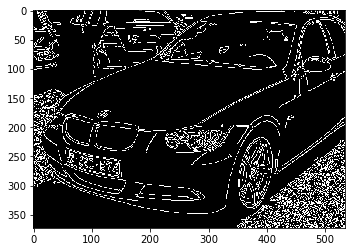

In [142]:
bfilter = cv2.bilateralFilter(gray, 17, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

# 3. Find Contours and Apply Mask

In [143]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

In [144]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [145]:
location

array([[[ 56, 235]],

       [[ 57, 262]],

       [[151, 284]],

       [[149, 257]]], dtype=int32)

In [146]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255,-1)
new_image = cv2.bitwise_and(img, img, mask=mask)

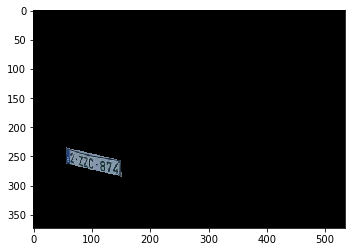

In [147]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [148]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

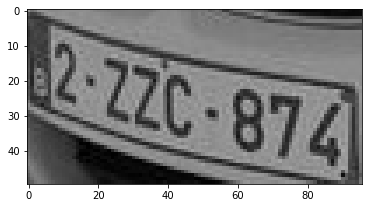

In [149]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

# 4. Use Easy OCR To Read Text

In [150]:
reader = easyocr.Reader(['en'])
result = reader.readtext(new_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[110, 254], [154, 254], [154, 286], [110, 286]], '874', 0.9948709611404555),
 ([[60.07351789077584, 234.10877514125852],
   [124.93734657298921, 252.29480359886762],
   [114.92648210922415, 283.89122485874145],
   [50.06265342701079, 265.7051964011324]],
  '277C48',
  0.0465631550666034)]

# 5. Render Result

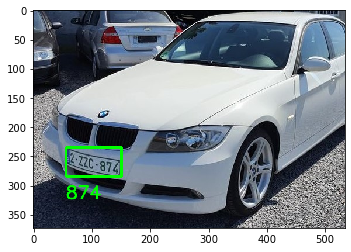

In [151]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))